# Import library and Dataset

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import json
import zipfile
import os
from pathlib import Path
api_token = {"username":"rattapornk","key":"9a9017f57e099d1b52bfccf94afccf30"}
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_token,handl)

In [ ]:
! kaggle datasets download -d rattapornk/memcatdata

100% 265k/265k [00:00<00:00, 460kB/s]
100% 265k/265k [00:00<00:00, 460kB/s]


In [ ]:
! unzip /content/memcatdata.zip

Archive:  /content/memcatdata.zip
  inflating: memcat_image_data.csv   


In [ ]:
! kaggle datasets download -d rattapornk/image-merged

100% 1.09G/1.09G [01:04<00:00, 23.5MB/s]
100% 1.09G/1.09G [01:04<00:00, 18.1MB/s]


In [ ]:
! unzip /content/image-merged.zip

Streaming output truncated to the last 5000 lines.
  inflating: merged/n02355227_5820.jpg  
  inflating: merged/n02355227_5898.jpg  
  inflating: merged/n02355227_6323.jpg  
  inflating: merged/n02355227_6434.jpg  
  inflating: merged/n02355227_6696.jpg  
  inflating: merged/n02355227_7587.jpg  
  inflating: merged/n02355227_7784.jpg  
  inflating: merged/n02355227_7881.jpg  
  inflating: merged/n02355227_8112.jpg  
  inflating: merged/n02355227_8561.jpg  
  inflating: merged/n02355227_8586.jpg  
  inflating: merged/n02355227_8789.jpg  
  inflating: merged/n02355227_9552.jpg  
  inflating: merged/n02355227_9703.jpg  
  inflating: merged/n02374451_17392.jpg  
  inflating: merged/n02374451_4963.jpg  
  inflating: merged/n02379743_11969.jpg  
  inflating: merged/n02381004_7100.jpg  
  inflating: merged/n02381004_8273.jpg  
  inflating: merged/n02381004_9323.jpg  
  inflating: merged/n02386310_9220.jpg  
  inflating: merged/n02387722_10980.jpg  
  inflating: merged/n02389026_1198.jpg  
  i

In [ ]:
! kaggle datasets download -d rattapornk/memcat-cat

100% 1.09G/1.09G [00:59<00:00, 19.9MB/s]
100% 1.09G/1.09G [00:59<00:00, 19.5MB/s]


In [ ]:
! unzip /content/memcat-cat.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape/n09376198_10845.jpg  
  inflating: landscape/n09376198_10901.jpg  
  inflating: landscape/n09376198_11171.jpg  
  inflating: landscape/n09376198_11360.jpg  
  inflating: landscape/n09376198_12294.jpg  
  inflating: landscape/n09376198_12692.jpg  
  inflating: landscape/n09376198_13588.jpg  
  inflating: landscape/n09376198_13928.jpg  
  inflating: landscape/n09376198_1396.jpg  
  inflating: landscape/n09376198_14485.jpg  
  inflating: landscape/n09376198_14571.jpg  
  inflating: landscape/n09376198_15308.jpg  
  inflating: landscape/n09376198_15319.jpg  
  inflating: landscape/n09376198_15467.jpg  
  inflating: landscape/n09376198_15858.jpg  
  inflating: landscape/n09376198_16065.jpg  
  inflating: landscape/n09376198_16253.jpg  
  inflating: landscape/n09376198_16513.jpg  
  inflating: landscape/n09376198_16757.jpg  
  inflating: landscape/n09376198_17428.jpg  
  inflating: landscape/n09376198_178.jpg  
  infla

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import cv2

import numpy as np
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision import transforms
import torchvision
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.utils import shuffle
import torchvision.models as models
import gc
from tqdm import tqdm
import torch.optim as optim
import random
import pandas as pd
from sklearn.utils import shuffle
import time

from transformers import ResNetConfig, ResNetModel
from transformers import AutoImageProcessor, ConvNextImageProcessor, ConvNextModel
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import timm

In [ ]:
! pip install torchsummary

In [ ]:
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
from scipy.stats import spearmanr

# Preprocess & Split

In [ ]:
df_merge = pd.read_csv("/content/memcat_image_data.csv")
df_merge["image_file"] =df_merge["image_file"].apply(lambda file: "/content/merged" +"/"+ file) # Create image path
df_merge["memorability_wo_fa_correction"] = df_merge["memorability_wo_fa_correction"].values.astype(np.float32)

In [ ]:
df_merge.head()

Unnamed: 0                        image_file category subcategory  \
0           1  /content/merged/000000003481.jpg   animal        bear   
1           2  /content/merged/000000005745.jpg   animal        bear   
2           3  /content/merged/000000011552.jpg   animal        bear   
3           4  /content/merged/000000027439.jpg   animal        bear   
4           5  /content/merged/000000055601.jpg   animal        bear   

   current_height  current_width source searched_label  resize_factor   H  FA  \
0           316.0          500.0   coco           bear            1.0  55   4   
1           427.0          640.0   coco           bear            1.0  64   4   
2           427.0          640.0   coco           bear            1.0  75   5   
3           359.0          640.0   coco           bear            1.0  92   3   
4           380.0          640.0   coco           bear            1.0  83  12   

   n_resp  memorability_wo_fa_correction  memorability_w_fa_correction  
0      98                       0.561224                      0.520408  
1      81                       0.790123                      0.740741  
2     104                       0.721154                      0.673077  
3     114                       0.807018                      0.780702  
4     102                       0.813725                      0.696078

Image shape: (10000, 224, 224, 3)
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 115.64354532711522
Standard deviation of pixel values: 68.17203453698677


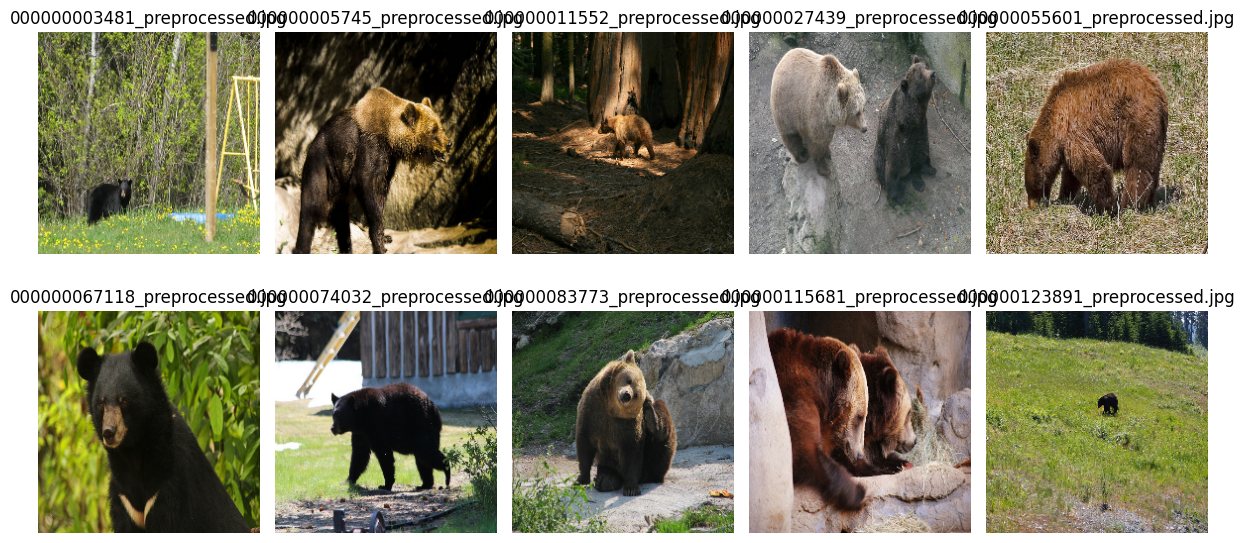

In [ ]:
# Sample data (replace this with your DataFrame)
df_merge = pd.DataFrame({
    'image_file': df_merge["image_file"],
    'memoscore': df_merge["memorability_wo_fa_correction"]
})

# Create a new column to store the paths of preprocessed images
df_merge['preprocessed_image_path'] = ''

# Empty lists to store preprocessed images
images = []

# Load and preprocess images
for index, row in df_merge.iterrows():
    image_path = row['image_file']
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error reading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize image if necessary

    # Save preprocessed image to the same path
    preprocessed_path = os.path.splitext(image_path)[0] + '_preprocessed.jpg'
    cv2.imwrite(preprocessed_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    # Store preprocessed image path in the DataFrame
    df_merge.at[index, 'preprocessed_image_path'] = preprocessed_path

    images.append(image)

# Convert the list of images into a NumPy array
images = np.array(images)

# Save preprocessed images as NumPy array (if needed)
#np.save('/content/drive/MyDrive/your_folder/preprocessed_images.npy', images)

# Calculate basic image statistics
print('Image shape:', images.shape)
print('Minimum pixel value:', np.min(images))
print('Maximum pixel value:', np.max(images))
print('Mean pixel value:', np.mean(images))
print('Standard deviation of pixel values:', np.std(images))

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(min(10, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(df_merge.at[i, 'preprocessed_image_path']))  # Display file name as title
plt.tight_layout()
plt.show()

# Display the updated DataFrame with preprocessed image paths
#print(df_merge)

In [ ]:
df_merge.head()

image_file  memoscore  \
0  /content/merged/000000003481.jpg   0.561224   
1  /content/merged/000000005745.jpg   0.790123   
2  /content/merged/000000011552.jpg   0.721154   
3  /content/merged/000000027439.jpg   0.807018   
4  /content/merged/000000055601.jpg   0.813725   

                         preprocessed_image_path  
0  /content/merged/000000003481_preprocessed.jpg  
1  /content/merged/000000005745_preprocessed.jpg  
2  /content/merged/000000011552_preprocessed.jpg  
3  /content/merged/000000027439_preprocessed.jpg  
4  /content/merged/000000055601_preprocessed.jpg

In [ ]:
del df_merge["image_file"]

In [ ]:
df_merge.head()

memoscore                        preprocessed_image_path
0   0.561224  /content/merged/000000003481_preprocessed.jpg
1   0.790123  /content/merged/000000005745_preprocessed.jpg
2   0.721154  /content/merged/000000011552_preprocessed.jpg
3   0.807018  /content/merged/000000027439_preprocessed.jpg
4   0.813725  /content/merged/000000055601_preprocessed.jpg

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(pd.DataFrame(df_merge.drop('memoscore', axis=1)), pd.DataFrame(df_merge['memoscore']), test_size=0.1)

# Split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

# Print the train, validation, and test set sizes
print('Train set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test set size:', len(X_test))

Train set size: 9000
Validation set size: 500
Test set size: 500


In [ ]:
X_train.head()

preprocessed_image_path
2818   /content/merged/n07893642_26236_preprocessed.jpg
8279    /content/merged/n02934451_5019_preprocessed.jpg
9432    /content/merged/n04461696_1344_preprocessed.jpg
4051  /content/merged/sun_aabtemlmesogqbbp_preproces...
3664   /content/merged/n07806221_25861_preprocessed.jpg

In [ ]:
merged_train_merge= pd.concat([X_train, y_train], axis=1)
merged_train_merge

preprocessed_image_path  memoscore
2818   /content/merged/n07893642_26236_preprocessed.jpg   0.794118
8279    /content/merged/n02934451_5019_preprocessed.jpg   0.805310
9432    /content/merged/n04461696_1344_preprocessed.jpg   0.598039
4051  /content/merged/sun_aabtemlmesogqbbp_preproces...   0.533981
3664   /content/merged/n07806221_25861_preprocessed.jpg   0.689320
...                                                 ...        ...
998    /content/merged/n02342885_10176_preprocessed.jpg   0.962617
2478      /content/merged/000000197597_preprocessed.jpg   0.696629
2567    /content/merged/n07880968_3235_preprocessed.jpg   0.941176
8941    /content/merged/n03670208_9655_preprocessed.jpg   0.877193
9983    /content/merged/n04610013_5869_preprocessed.jpg   0.767442

[9000 rows x 2 columns]

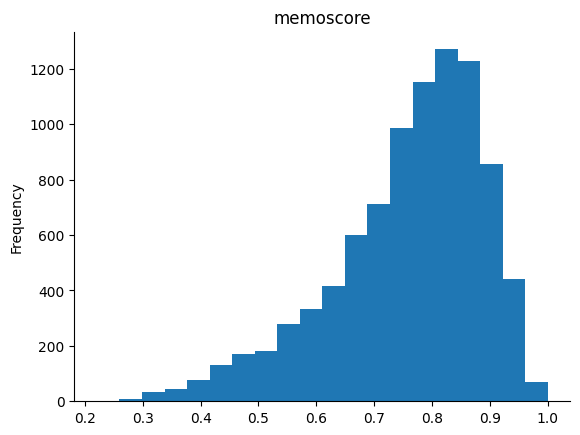

In [ ]:
# @title memoscore

from matplotlib import pyplot as plt
merged_train_merge['memoscore'].plot(kind='hist', bins=20, title='memoscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_val_merge = pd.concat([X_val, y_val], axis=1)
merged_val_merge

preprocessed_image_path  memoscore
9522  /content/merged/n04465501_11845_preprocessed.jpg   0.858586
4869   /content/merged/n03634034_2423_preprocessed.jpg   0.717949
262   /content/merged/n01791625_16028_preprocessed.jpg   0.765432
2036  /content/merged/n07693725_11229_preprocessed.jpg   0.774510
1377   /content/merged/n02332755_4283_preprocessed.jpg   0.807018
...                                                ...        ...
9464   /content/merged/n04461696_2750_preprocessed.jpg   0.792079
8369  /content/merged/n02946348_35937_preprocessed.jpg   0.817204
1866   /content/merged/n02396427_2997_preprocessed.jpg   0.900000
1208  /content/merged/n02129165_12209_preprocessed.jpg   0.892473
8342  /content/merged/n02946348_19028_preprocessed.jpg   0.623529

[500 rows x 2 columns]

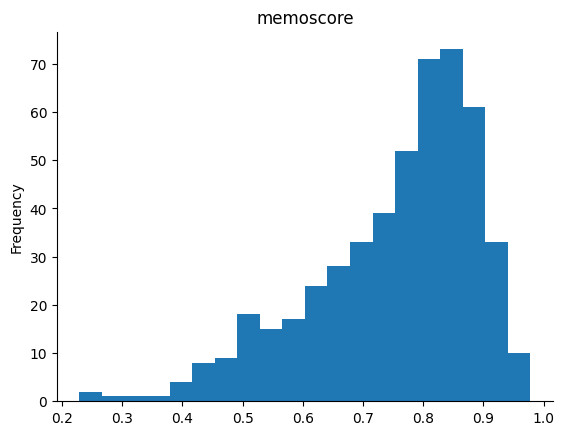

In [ ]:
# @title memoscore

from matplotlib import pyplot as plt
merged_val_merge['memoscore'].plot(kind='hist', bins=20, title='memoscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_test_merge = pd.concat([X_test, y_test], axis=1)
merged_test_merge

preprocessed_image_path  memoscore
9113   /content/merged/n03791053_10202_preprocessed.jpg   0.777778
2136      /content/merged/000000468615_preprocessed.jpg   0.927083
9951    /content/merged/n04610013_2271_preprocessed.jpg   0.707071
8790    /content/merged/n03541923_2652_preprocessed.jpg   0.836364
6789  /content/merged/df85986ebb487f15_preprocessed.jpg   0.869159
...                                                 ...        ...
8415    /content/merged/n04166281_2937_preprocessed.jpg   0.811881
8934    /content/merged/n03670208_7337_preprocessed.jpg   0.842593
3025      /content/merged/000000341209_preprocessed.jpg   0.945652
5875  /content/merged/0b783ffdb85acb7a_preprocessed.jpg   0.637500
9041      /content/merged/000000529774_preprocessed.jpg   0.722222

[500 rows x 2 columns]

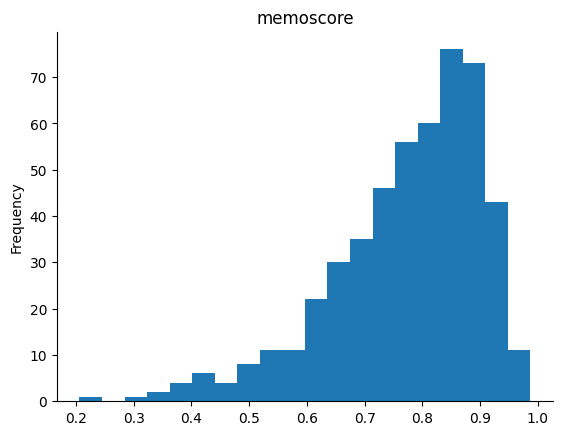

In [ ]:
# @title memoscore

from matplotlib import pyplot as plt
merged_test_merge['memoscore'].plot(kind='hist', bins=20, title='memoscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Save CSV To GGDrive

In [ ]:
# บันทึกตารางเป็นไฟล์ CSV
csv_train_merge = '/content/drive/MyDrive/IS/MemCat_data/dataproject/train/merge_ResNet.csv'
merged_train_merge.to_csv(csv_train_merge, index=False)

In [ ]:
csv_val_merge = '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/merge_ResNet.csv'
merged_val_merge.to_csv(csv_val_merge, index=False)

In [ ]:
csv_test_merge = '/content/drive/MyDrive/IS/MemCat_data/dataproject/test/merge_ResNet.csv'
merged_test_merge.to_csv(csv_test_merge, index=False)

#Load Dataset

In [ ]:
df_train_merge = pd.read_csv("/content/drive/MyDrive/IS/MemCat_data/dataproject/train/merge_ResNet.csv")
df_val_merge = pd.read_csv( '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/merge_ResNet.csv')
df_test_merge = pd.read_csv('/content/drive/MyDrive/IS/MemCat_data/dataproject/test/merge_ResNet.csv')

In [ ]:
df_train_merge.head()

preprocessed_image_path  memoscore
0   /content/merged/n02932891_23097_preprocessed.jpg   0.521368
1      /content/merged/000000476074_preprocessed.jpg   0.692982
2    /content/merged/n07717556_1981_preprocessed.jpg   0.805556
3  /content/merged/84ebed9f630e379a_preprocessed.jpg   0.813725
4      /content/merged/000000038701_preprocessed.jpg   0.975610

In [ ]:
df_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   preprocessed_image_path  9000 non-null   object 
 1   memoscore                9000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.8+ KB


#Load Pretrain

In [ ]:
# Define function to add data/model in to GPU (cuda)
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    # if data is list or tuple, move each of them to device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device) -> None:
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            # yield only execuate when the function is called
            yield to_device(b, self. device)

    def __len__(self):
        return len(self.dl)

## Train

In [ ]:
class Dataset_res_merge(Dataset):
    def __init__(self, df,Resnet_transform =None):
        self.labels = df_train_merge["memoscore"]
        self.images = df_train_merge["preprocessed_image_path"]
        self.Resnet_transform  = Resnet_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.Resnet_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
#trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
Resnet_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds = Dataset_res_merge(df_train_merge, Resnet_transform =Resnet_transform )
train_dl = DataLoader(train_ds, batch_size=32, shuffle=False)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
class ResNet_model_train_merge(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):    #microsoft/resnet-50
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)
        #self.res_AdaptiveAvgPool = nn.AdaptiveAvgPool2d((1, None))


    def forward(self, x):
        resfeat = self.res(x)
        #adap = self.res_AdaptiveAvgPool(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res =  ResNet_model_train_merge( arch="resnet50.a1_in1k")


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [ ]:
# Assuming your model is an instance of YourModelClass and is already on GPU
model =ResNet_model_train_merge().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
model_res  = to_device(model_res  , device)

In [ ]:
params = [param for param in list(model_res.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-5)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res, train_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(30, model_res , train_dl)
torch.save(model_res.state_dict(), "model_weights_1")

In [ ]:
true_values_list = []
predicted_values_list = []

for x_trans, yb in train_dl:
    preds = model_res(x_trans)
    true_values_list.extend(yb.cpu().detach().numpy())
    predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_merge' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_train_merge['preprocessed_image_path'],
    'True Value': true_values_list,  # Replace with your actual true values
    'Predicted Value': predicted_values_list  # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)



In [ ]:
from prettytable import PrettyTable

# Assuming 'df_result' is your DataFrame
# The 'Image Path' column should contain the paths to your images

# Create a PrettyTable instance
table = PrettyTable()

# Add column names
table.field_names = df_result.columns.tolist()

# Add rows
for _, row in df_result.iterrows():
    table.add_row(row.tolist())

# Display the table
print(table)

## Valid

In [ ]:
class Dataset_val_resnet_merge(Dataset):
    def __init__(self, df,res_transform=None):
        self.labels = df_val_merge["memoscore"]
        self.images = df_val_merge["preprocessed_image_path"]
        self.res_transform = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform(image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
val_ds =Dataset_val_resnet_merge(df_val_merge,res_transform=res_transform)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)

In [ ]:
class ResNet_model_val_merge(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)


    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

ResNet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_val =  ResNet_model_val_merge( arch="resnet50.a1_in1k")

In [ ]:


# Assuming your model is an instance of YourModelClass and is already on GPU
model = ResNet_model_val_merge().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
device = get_default_device()
val_dl = DeviceDataLoader(val_dl, device)
model_res_val  = to_device(model_res_val  , device)

In [ ]:
params = [param for param in list(model_res_val.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-5)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
#Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# val the model and save weights
fit(50, model_res_val , val_dl )
torch.save(model_res_val .state_dict(), "model_weights_s")

In [ ]:
true_values_list_val = []
predicted_values_list_val = []

for x_trans, yb in val_dl:
    preds = model_res_val(x_trans)
    true_values_list_val.extend(yb.cpu().detach().numpy())
    predicted_values_list_val.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_merge' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_val_merge['preprocessed_image_path'],
    'True Value': true_values_list_val,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_val # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                            Image Path  True Value  \
0     /content/merged/n09468604_15732_preprocessed.jpg    0.432692   
1    /content/merged/c652f7fdedfe6979_preprocessed.jpg    0.584270   
2        /content/merged/000000158183_preprocessed.jpg    0.822430   
3    /content/merged/00229645efaf204f_preprocessed.jpg    0.866667   
4    /content/merged/4e9a1e1079484886_preprocessed.jpg    0.588235   
..                                                 ...         ...   
495   /content/merged/n04610013_10214_preprocessed.jpg    0.719298   
496   /content/merged/n04335435_12205_preprocessed.jpg    0.873950   
497  /content/merged/5c3d7e1e55326af8_preprocessed.jpg    0.763441   
498   /content/merged/n02946348_23420_preprocessed.jpg    0.854167   
499   /content/merged/n07690273_20834_preprocessed.jpg    0.931818   

     Predicted Value  
0           0.524997  
1           0.575758  
2           0.794889  
3           0.824519  
4           0.564090  
..               ... 

## Test

In [ ]:
df_test_merge.head()


preprocessed_image_path  memoscore
0  /content/merged/sun_aucxqplfgkjwgjrf_preproces...   0.327434
1    /content/merged/n04166281_6786_preprocessed.jpg   0.810345
2      /content/merged/000000321306_preprocessed.jpg   0.831776
3  /content/merged/15a31fcb17bda9ed_preprocessed.jpg   0.897727
4      /content/merged/000000541450_preprocessed.jpg   0.861111

In [ ]:
class Dataset_test_res_merge(Dataset):
    def __init__(self, df, res_transform =None):
        self.labels = df_test_merge["memoscore"]
        self.images = df_test_merge["preprocessed_image_path"]
        self.res_transform  = res_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_transform (image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
test_ds = Dataset_test_res_merge(df_test_merge, res_transform =res_transform )
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

In [ ]:
print(test_ds)

In [ ]:
class Resnet_model_test_res_merge(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)

    def forward(self, x):
        resfeat = self.res(x)
        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_test = Resnet_model_test_res_merge( arch="resnet50.a1_in1k")

In [ ]:


# Assuming your model is an instance of YourModelClass and is already on GPU
model = Resnet_model_test_res_merge().cuda()

# Assuming your input tensor shape
input_tensor_shape = ( 3   ,224,224)

# Print the model summary
summary(model, input_tensor_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
         Identity-10           [-1, 64, 56, 56]               0
             ReLU-11           [-1, 64, 56, 56]               0
         Identity-12           [-1, 64, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
device = get_default_device()
test_dl = DeviceDataLoader(test_dl, device)
model_res_test  = to_device(model_res_test  , device)

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad ]
optimizer = torch.optim.Adam(params, lr=1e-5)   #,weight_decay=1e-7

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)



In [ ]:
# val the model and save weights
fit(50, model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds =model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_merge' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result = pd.DataFrame({
    'Image Path': df_test_merge['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result)

                                            Image Path  True Value  \
0    /content/merged/sun_aucxqplfgkjwgjrf_preproces...    0.327434   
1      /content/merged/n04166281_6786_preprocessed.jpg    0.810345   
2        /content/merged/000000321306_preprocessed.jpg    0.831776   
3    /content/merged/15a31fcb17bda9ed_preprocessed.jpg    0.897727   
4        /content/merged/000000541450_preprocessed.jpg    0.861111   
..                                                 ...         ...   
495   /content/merged/n09421951_25160_preprocessed.jpg    0.660551   
496  /content/merged/256df73150910719_preprocessed.jpg    0.532710   
497   /content/merged/n04349306_14046_preprocessed.jpg    0.884615   
498    /content/merged/n00464894_9950_preprocessed.jpg    0.814815   
499    /content/merged/n03541923_3877_preprocessed.jpg    0.692308   

     Predicted Value  
0           0.486310  
1           0.820088  
2           0.861615  
3           0.902471  
4           0.866664  
..               ... 

#Finetuning

##Train

In [ ]:
class Dataset_train_fine(Dataset):
    def __init__(self, df,res_fine_transform =None):
        self.labels = df_train_merge["memoscore"]
        self.images = df_train_merge["preprocessed_image_path"]
        self.res_fine_transform  = res_fine_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.res_fine_transform(image, return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        # แสดงขนาดรูปภาพหลังการ transform
        #print("Transformed image size:", image_trans.shape)

        label = self.labels[idx]

        return image_trans, label

# สร้างตัวแปรสำหรับ ViTFeatureExtractor
res_fine_transform   = ConvNextImageProcessor.from_pretrained("facebook/convnext-tiny-224")

# สร้าง Dataset และ DataLoader
train_ds_fine = Dataset_train_fine(df_train_merge, res_fine_transform =res_fine_transform )
train_dl_fine = DataLoader(train_ds_fine, batch_size=16, shuffle=False)


In [ ]:
class Resmem_model_fine_merge(torch.nn.Module):
    def __init__(self, arch="resnet50.a1_in1k"):
        super().__init__()
        self.arch = arch
        self.res = timm.create_model(self.arch, pretrained=True, num_classes=1)



    def forward(self, x):
        resfeat = self.res(x)

        out = torch.sigmoid(resfeat)
        return out



NORMALIZE_MEAN = (0.0, 0.0, 0.0)
NORMALIZE_STD = (1.0, 1.0, 1.0)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)
])

model_res_fine =  Resmem_model_fine_merge( arch="resnet50.a1_in1k")

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_fine = DeviceDataLoader(train_dl_fine, device)
model_res_fine = to_device(model_res_fine  , device)

In [ ]:
params = [param for param in list(model_res_fine.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-5 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_fine, train_dl_fine):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_fine.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in train_dl_fine:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_fine(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# Training the model and save weights
fit(20,model_res_fine , train_dl)
torch.save(model_res_fine.state_dict(), "model_weights_fine")

## valid

In [ ]:
params = [param for param in list(model_res_val .parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-5,weight_decay=1e-6)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Val Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_val, val_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_val.train()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in val_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_val(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)


 Epoch: (1/10) Loss = 0.002541395602747798

 Epoch: (1/10) Loss_rmse = 0.05041225627064705

 Epoch: (1/10) R^2 = 0.9028570055961609

 Epoch: (1/10) MAE = 0.029330028221011162
Spearman correlation coefficient: SignificanceResult(statistic=0.9762899713439734, pvalue=7.753e-320)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.584158

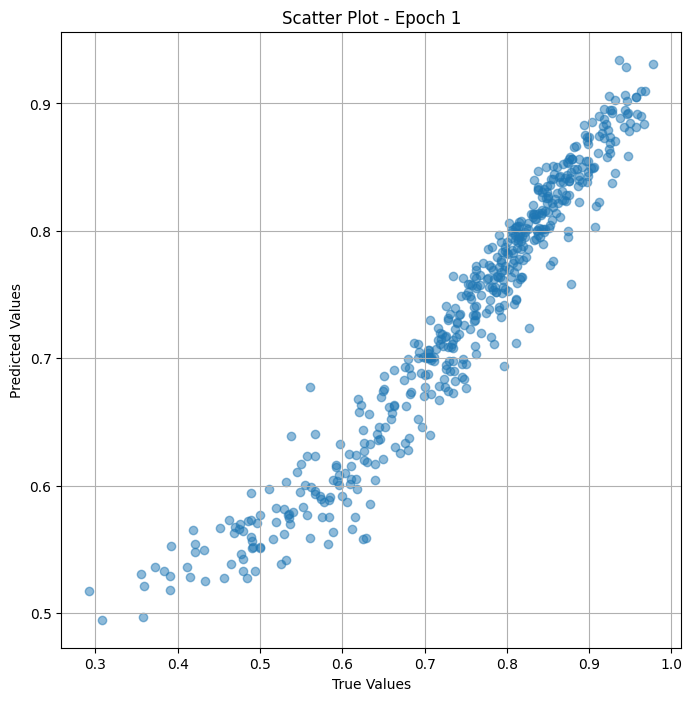

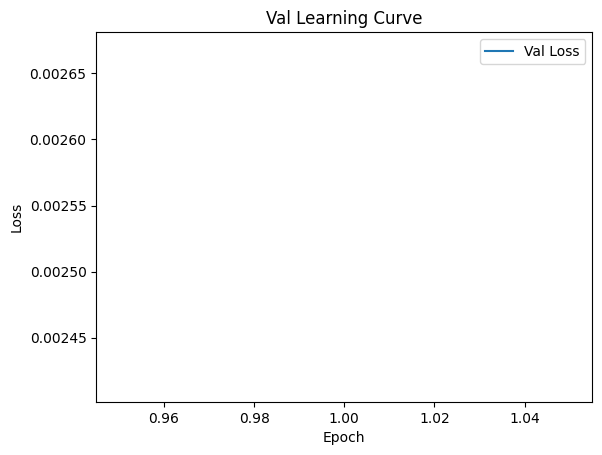


 Epoch: (2/10) Loss = 0.002297884551808238

 Epoch: (2/10) Loss_rmse = 0.04793625324964523

 Epoch: (2/10) R^2 = 0.9121650457382202

 Epoch: (2/10) MAE = 0.026264136657118797
Spearman correlation coefficient: SignificanceResult(statistic=0.9808637900621573, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.94

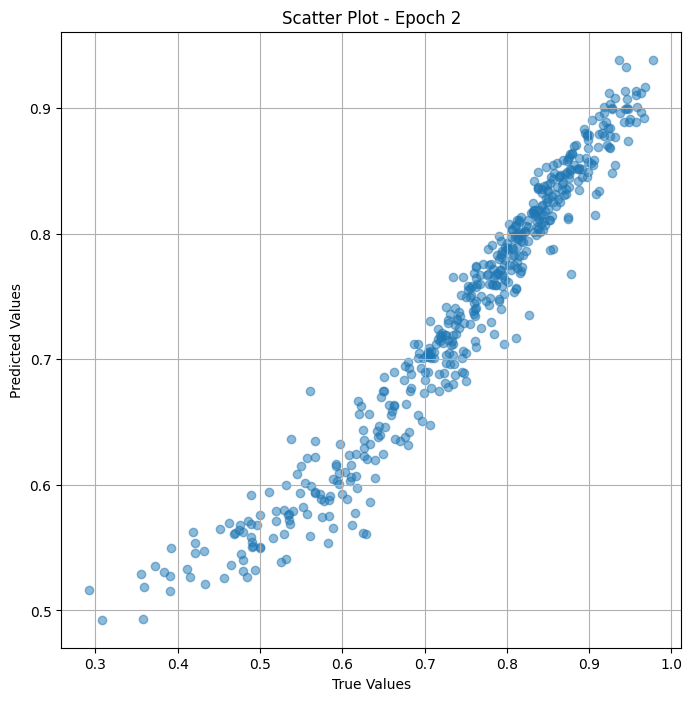

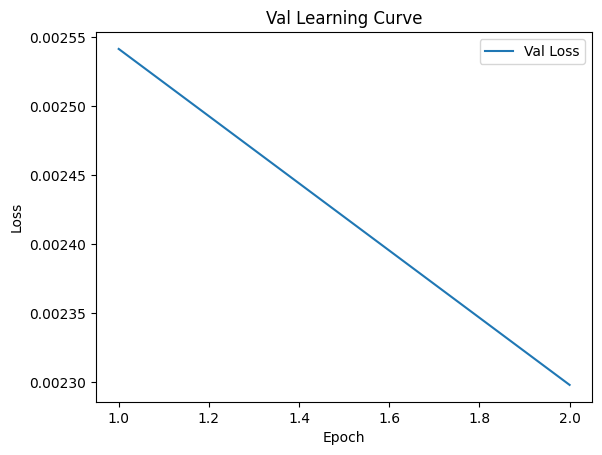


 Epoch: (3/10) Loss = 0.002099925186485052

 Epoch: (3/10) Loss_rmse = 0.045824941247701645

 Epoch: (3/10) R^2 = 0.9197319149971008

 Epoch: (3/10) MAE = 0.023483308032155037
Spearman correlation coefficient: SignificanceResult(statistic=0.9837627916443771, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.9

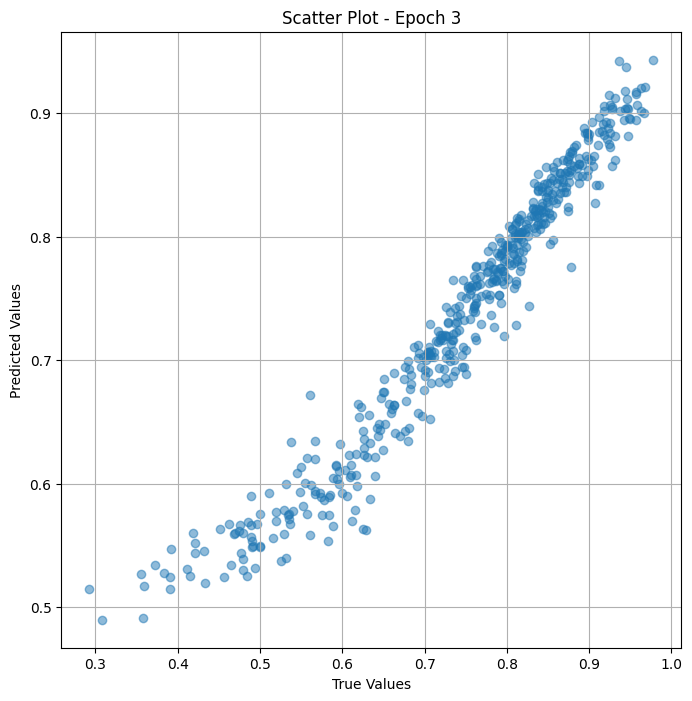

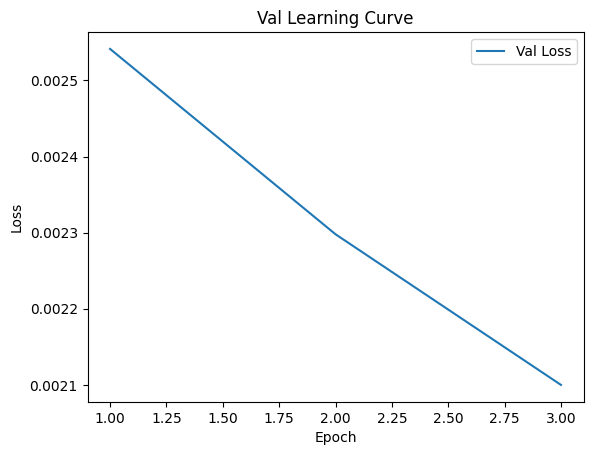


 Epoch: (4/10) Loss = 0.0019350833026692271

 Epoch: (4/10) Loss_rmse = 0.04398958012461662

 Epoch: (4/10) R^2 = 0.9260328412055969

 Epoch: (4/10) MAE = 0.021366475149989128
Spearman correlation coefficient: SignificanceResult(statistic=0.9860230080967346, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.9

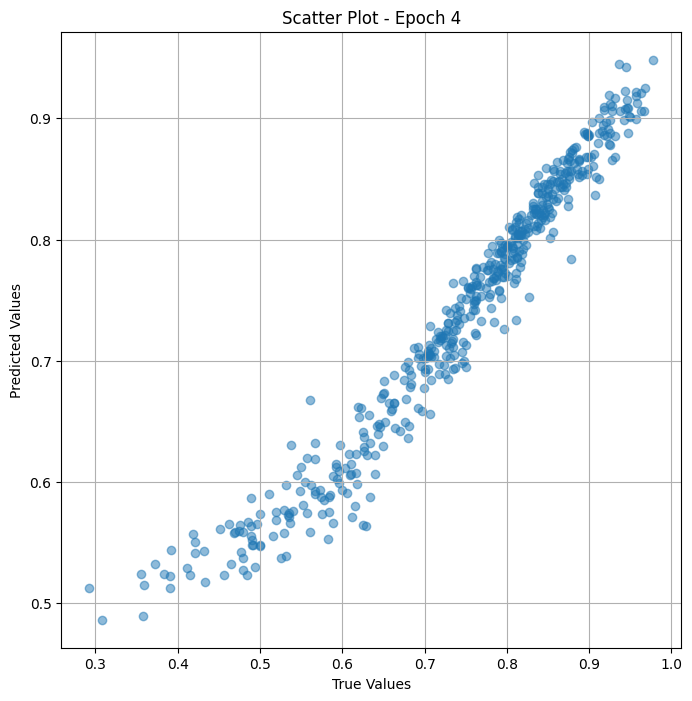

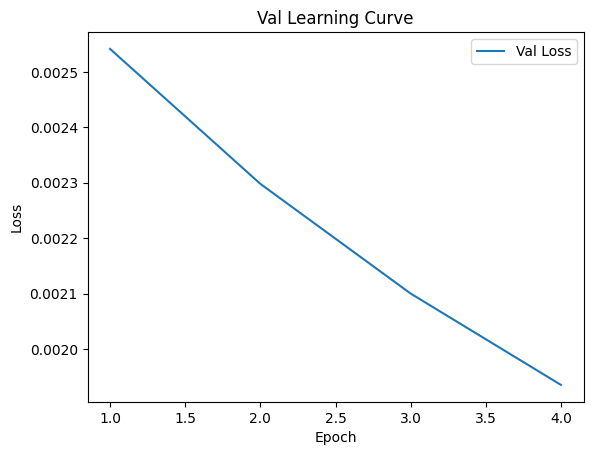


 Epoch: (5/10) Loss = 0.0017988082254305482

 Epoch: (5/10) Loss_rmse = 0.04241235926747322

 Epoch: (5/10) R^2 = 0.9312418699264526

 Epoch: (5/10) MAE = 0.019409963861107826
Spearman correlation coefficient: SignificanceResult(statistic=0.9878562465490905, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.9

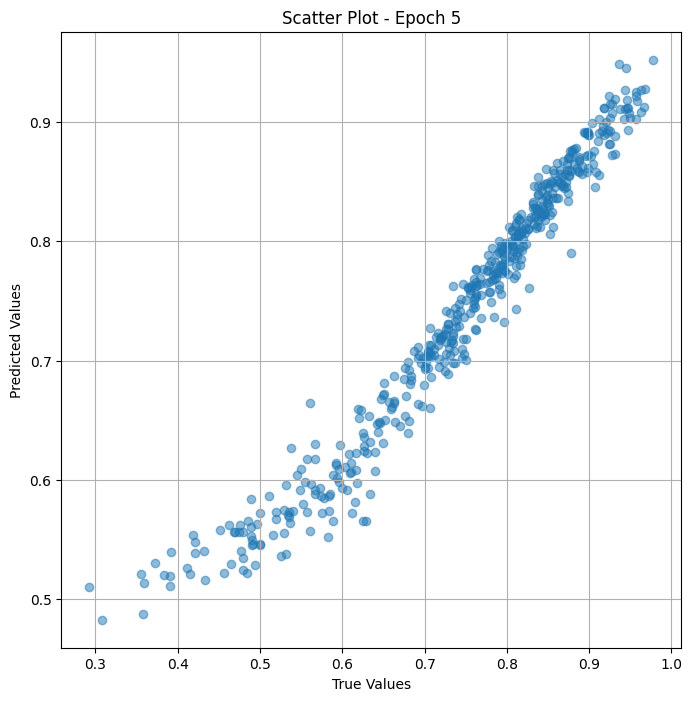

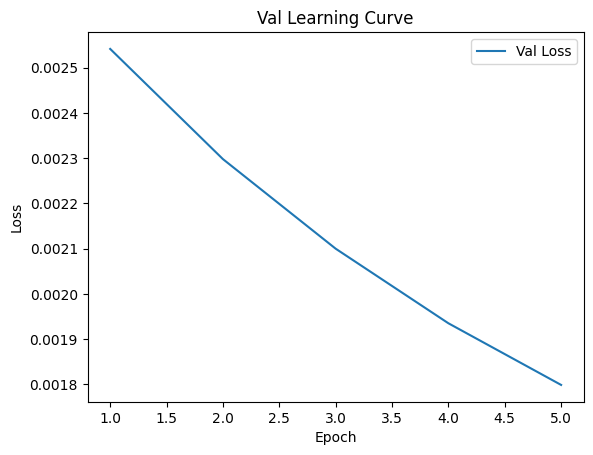


 Epoch: (6/10) Loss = 0.001674977713264525

 Epoch: (6/10) Loss_rmse = 0.0409264899790287

 Epoch: (6/10) R^2 = 0.935975193977356

 Epoch: (6/10) MAE = 0.017875641584396362
Spearman correlation coefficient: SignificanceResult(statistic=0.9895074632492227, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.9493

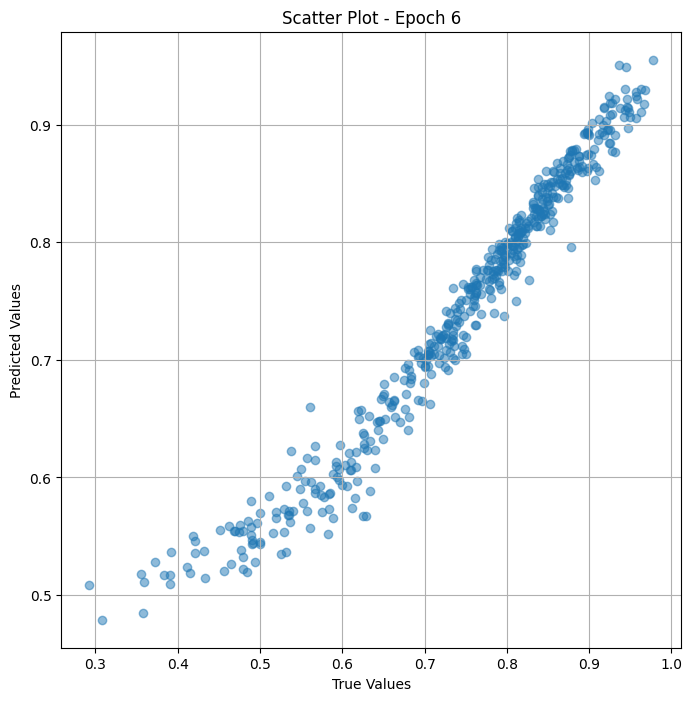

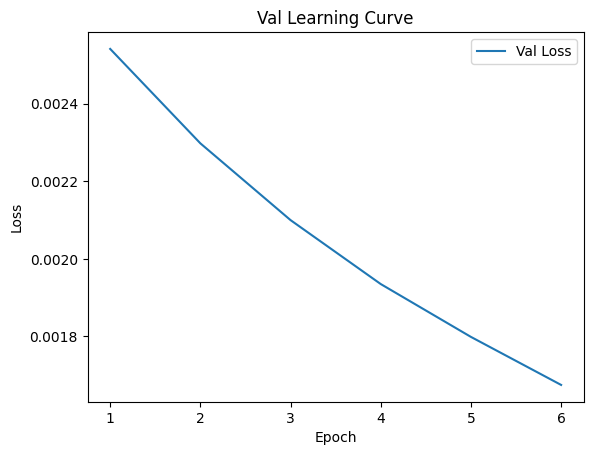


 Epoch: (7/10) Loss = 0.0015572091797366738

 Epoch: (7/10) Loss_rmse = 0.039461489766836166

 Epoch: (7/10) R^2 = 0.9404768347740173

 Epoch: (7/10) MAE = 0.016490742564201355
Spearman correlation coefficient: SignificanceResult(statistic=0.9909870749412222, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.

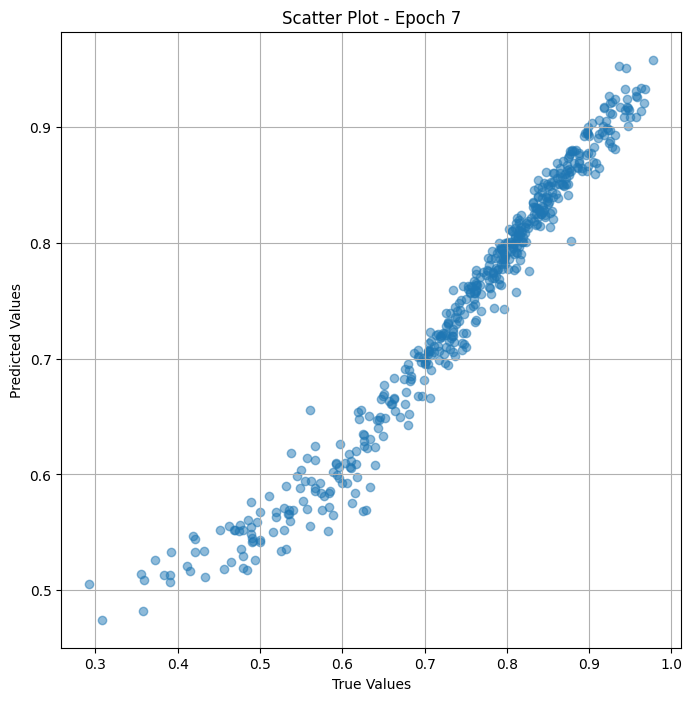

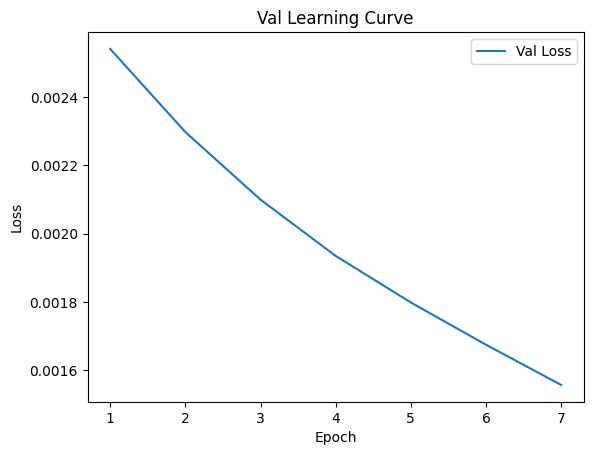


 Epoch: (8/10) Loss = 0.0014567415928468108

 Epoch: (8/10) Loss_rmse = 0.038167282938957214

 Epoch: (8/10) R^2 = 0.944317102432251

 Epoch: (8/10) MAE = 0.015380270779132843
Spearman correlation coefficient: SignificanceResult(statistic=0.9921540215488495, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.9

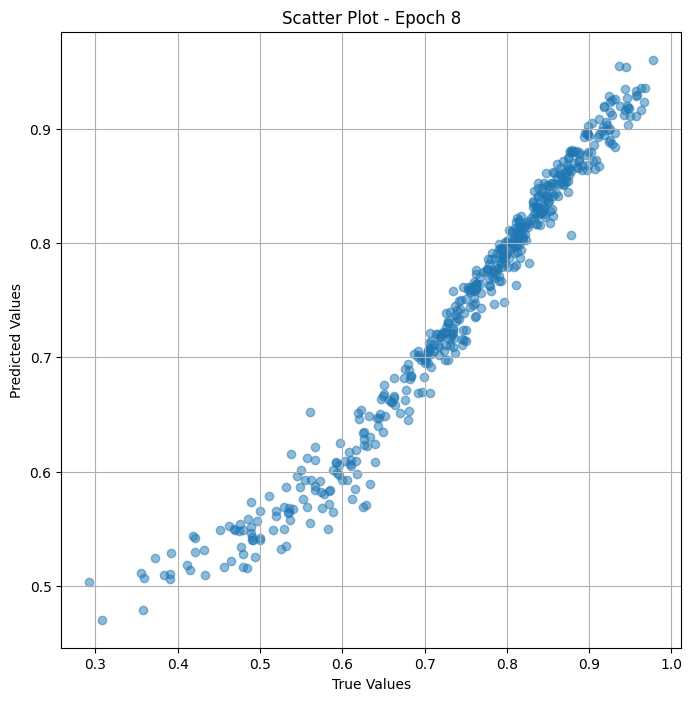

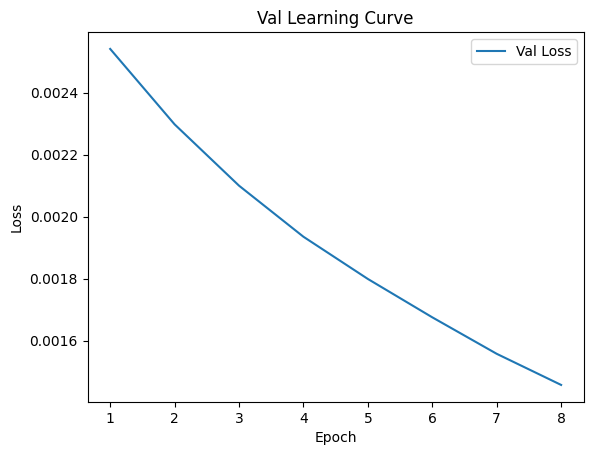


 Epoch: (9/10) Loss = 0.0013584563275799155

 Epoch: (9/10) Loss_rmse = 0.0368572436273098

 Epoch: (9/10) R^2 = 0.9480739831924438

 Epoch: (9/10) MAE = 0.01434334646910429
Spearman correlation coefficient: SignificanceResult(statistic=0.9930585421607963, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 0.949

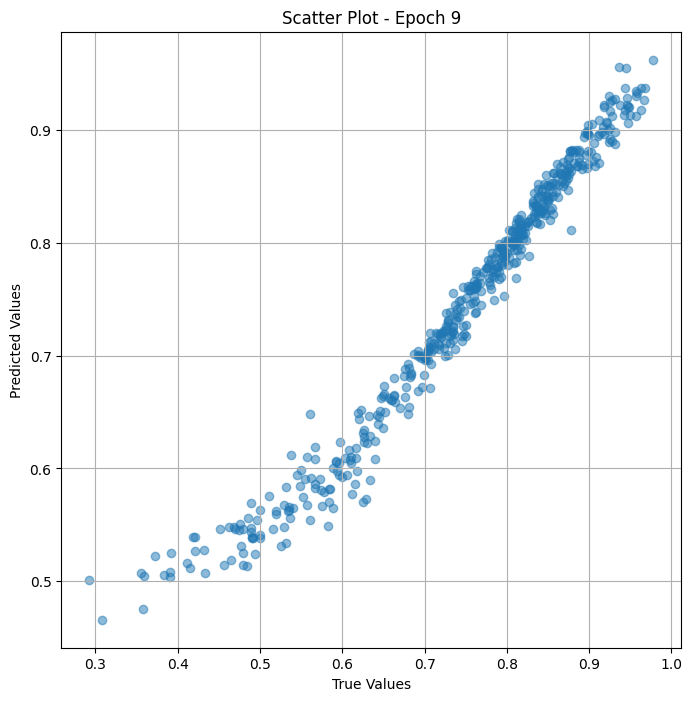

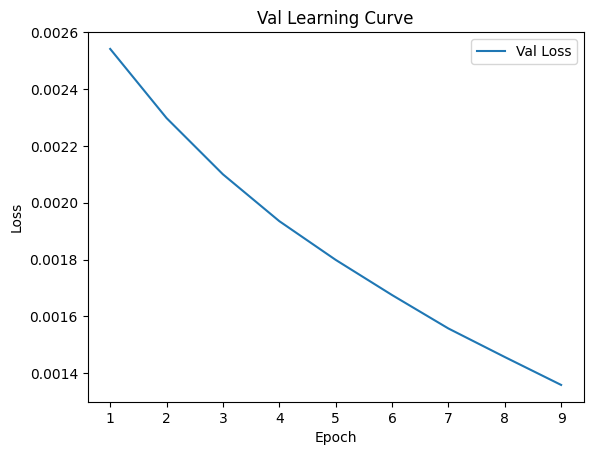


 Epoch: (10/10) Loss = 0.0012662822846323252

 Epoch: (10/10) Loss_rmse = 0.03558485954999924

 Epoch: (10/10) R^2 = 0.951597273349762

 Epoch: (10/10) MAE = 0.013199846260249615
Spearman correlation coefficient: SignificanceResult(statistic=0.9937733369702012, pvalue=0.0)

 true_values_list_val : 500

 predicted_values_list_val : 500

 true_values_list_val : [0.43269232, 0.58426964, 0.8224299, 0.8666667, 0.5882353, 0.72897196, 0.80701756, 0.81395346, 0.6630435, 0.86725664, 0.95652175, 0.70408165, 0.8125, 0.625, 0.74311924, 0.92, 0.9464286, 0.67021275, 0.82300884, 0.79611653, 0.84782606, 0.53535354, 0.8981481, 0.875, 0.8727273, 0.8543689, 0.8125, 0.46938777, 0.84375, 0.67777777, 0.5673077, 0.8453608, 0.8974359, 0.89166665, 0.70652175, 0.93203884, 0.7809524, 0.6037736, 0.94736844, 0.74489796, 0.9245283, 0.85263157, 0.76842105, 0.86238533, 0.7790698, 0.7083333, 0.74725276, 0.78494626, 0.8111111, 0.3904762, 0.35779816, 0.84210527, 0.79787236, 0.8021978, 0.49579832, 0.8737864, 0.5841584, 

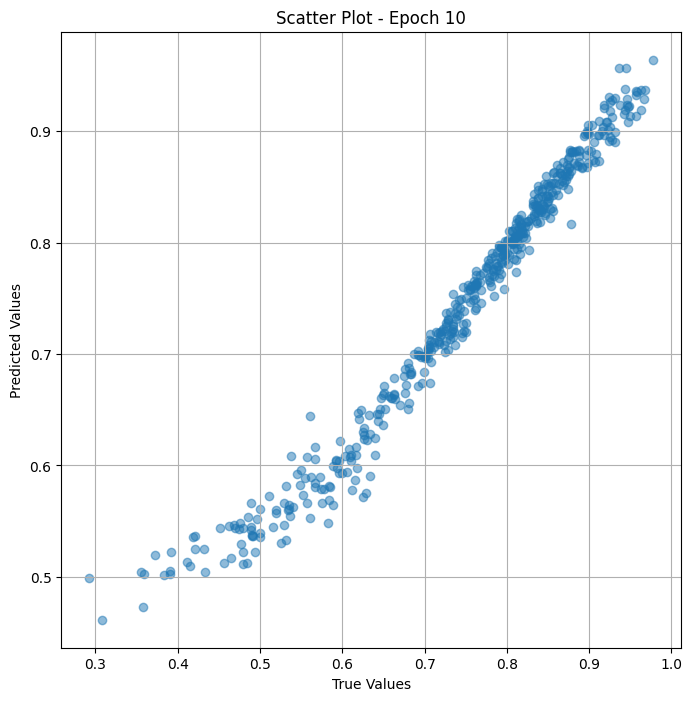

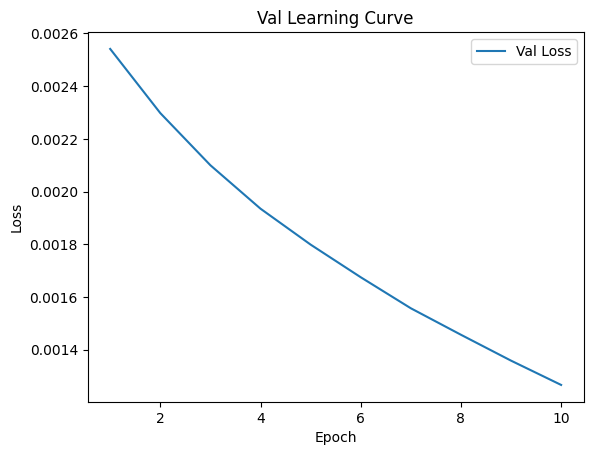

In [ ]:
# val the model and save weights
fit(10, model_res_val  , val_dl )
torch.save(model_res_val.state_dict(), "model_weights_s")

## Test

In [ ]:
params = [param for param in list(model_res_test.parameters()) if param.requires_grad == True ]
optimizer = torch.optim.Adam(params, lr=1e-5 ,weight_decay=1e-7)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
# Define the plot_scatter function
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

def plot_learning_curve(loss_list):
    plt.plot(range(1, len(loss_list) + 1), loss_list, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Learning Curve')
    plt.legend()
    plt.show()

def fit(epochs,model_res_test, test_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()
    total_loss_list = []


    for epoch in range(epochs):
        model_res_test.eval()
        batch_num = 32
        true_values_list = []
        predicted_values_list = []

        for x_trans, yb in test_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            total_spearman =0
            #total_spearman = 0

            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_res_test(x_trans)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

            #calculate  spearman
            spearman_corr = spearmanr(true_values_list, predicted_values_list)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())



            # Backpropagation
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Print batch information
            #print('\nBatch:', batch_num)
            #print('True Values:', yb.cpu().detach().numpy())
            #print('Predicted Values:', preds.squeeze().cpu().detach().numpy())

            # Accumulate losses, R-squared, MAE, and Spearman values for the epoch
            total_loss = loss.item()
            total_loss_rmse = loss_rmse.item()
            total_r2 = r2.item()
            total_mae = mae.item()

            # Increment batch number
            batch_num += 10
        # Adjust learning rate scheduler based on total_loss
        sched.step(total_loss, total_loss_rmse)

        # Calculate mean R-squared, MAE, and Spearman for the epoch
        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num
        #mean_spearman = total_spearman / len(train_dl)

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        print("Spearman correlation coefficient:", spearman_corr)
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        total_loss_list.append(total_loss)
        plot_scatter(true_values_list, predicted_values_list, epoch)
        plot_learning_curve(total_loss_list)

In [ ]:
# val the model and save weights
fit(40,model_res_test , test_dl )
torch.save(model_res_test.state_dict(), "model_weights_s")

In [ ]:
true_values_list_test = []
predicted_values_list_test = []

for x_trans, yb in test_dl:
    preds = model_res_test(x_trans)
    true_values_list_test.extend(yb.cpu().detach().numpy())
    predicted_values_list_test.extend(preds.squeeze().cpu().detach().numpy())



# Assuming 'df_test_merge' is your original DataFrame and 'true_values' and 'predicted_values' are lists of true and predicted values
df_result_fine = pd.DataFrame({
    'Image Path': df_test_merge['preprocessed_image_path'],
    'True Value': true_values_list_test,  # Replace with your actual true values
    'Predicted Value': predicted_values_list_test # Replace with your actual predicted values
})

# Display the resulting DataFrame
print(df_result_fine)

                                            Image Path  True Value  \
0    /content/merged/sun_aucxqplfgkjwgjrf_preproces...    0.327434   
1      /content/merged/n04166281_6786_preprocessed.jpg    0.810345   
2        /content/merged/000000321306_preprocessed.jpg    0.831776   
3    /content/merged/15a31fcb17bda9ed_preprocessed.jpg    0.897727   
4        /content/merged/000000541450_preprocessed.jpg    0.861111   
..                                                 ...         ...   
495   /content/merged/n09421951_25160_preprocessed.jpg    0.660551   
496  /content/merged/256df73150910719_preprocessed.jpg    0.532710   
497   /content/merged/n04349306_14046_preprocessed.jpg    0.884615   
498    /content/merged/n00464894_9950_preprocessed.jpg    0.814815   
499    /content/merged/n03541923_3877_preprocessed.jpg    0.692308   

     Predicted Value  
0           0.430929  
1           0.812551  
2           0.838690  
3           0.899978  
4           0.863702  
..               ... 

# ทดสอบกับรูปอื่นๆ

ลองทดสอบรูปจากค่าความจดจำจริง ของรูปนี้คือ  0.43

Estimated memorability: tensor([[0.4880]], grad_fn=<SigmoidBackward0>)


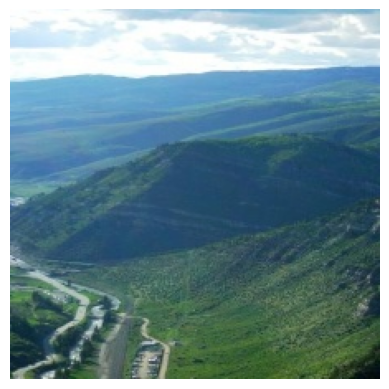

In [ ]:
model = Resnet_model_test_res_merge()
image = Image.open("/content/merged/n09468604_15732_preprocessed.jpg")

# Define preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data = preprocess(image)

# Add batch dimension as the model expects a batch
input_data = input_data.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model = Resnet_model_test_res_merge()
memorability = model(input_data)

print(f"Estimated memorability: {memorability}")
# แสดงภาพ
plt.imshow(image)
plt.axis('off')  # ปิดแกน x และ y
plt.show()



ทดสอบกับรูปอื่นๆ

Estimated memorability: tensor([[0.5152]], grad_fn=<SigmoidBackward0>)


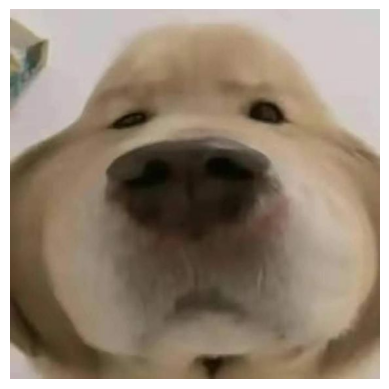

In [ ]:
model = Resmem_model_fine_merge()
image_testest = Image.open("/content/drive/MyDrive/poster8.jpeg")

# Define preprocessing transforms
preprocess_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data_test = preprocess_test(image_testest)

# Add batch dimension as the model expects a batch
input_data_test = input_data_test.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model_test =Resmem_model_fine_merge()
memorability_test = model_test(input_data_test)

print(f"Estimated memorability: {memorability_test}")
# แสดงภาพ
plt.imshow(image_testest)
plt.axis('off')  # ปิดแกน x และ y
plt.show()


Estimated memorability: tensor([[0.4964]], grad_fn=<SigmoidBackward0>)


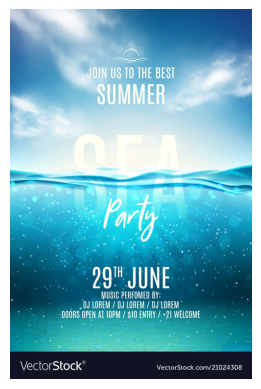

In [ ]:
model = ResNet_model_val_merge()
image_testest = Image.open("/content/drive/MyDrive/poster3.jpeg")

# Define preprocessing transforms
preprocess_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data_test = preprocess_test(image_testest)

# Add batch dimension as the model expects a batch
input_data_test = input_data_test.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model_test = ResNet_model_val_merge()
memorability_test = model_test(input_data_test)

print(f"Estimated memorability: {memorability_test}")
# แสดงภาพ
plt.imshow(image_testest)
plt.axis('off')  # ปิดแกน x และ y
plt.show()



Estimated memorability: tensor([[0.5126]], grad_fn=<SigmoidBackward0>)


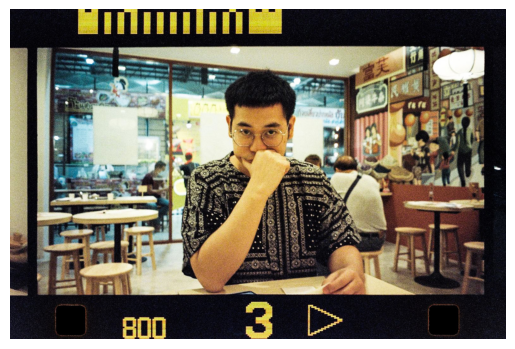

In [ ]:
model = ResNet_model_val_merge()
image_testest = Image.open("/content/drive/MyDrive/Classroom/16B7DA9D-3DA2-4865-AB50-78628246BE10_1_105_c.jpeg")

# Define preprocessing transforms
preprocess_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size expected by the model
    transforms.ToTensor(),           # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Normalize the image
])

# Apply preprocessing transforms
input_data_test = preprocess_test(image_testest)

# Add batch dimension as the model expects a batch
input_data_test = input_data_test.unsqueeze(0)

# Assuming ViTMem_model is a PyTorch model
model_test = ResNet_model_val_merge()
memorability_test = model_test(input_data_test)

print(f"Estimated memorability: {memorability_test}")
# แสดงภาพ
plt.imshow(image_testest)
plt.axis('off')  # ปิดแกน x และ y
plt.show()